**Alina Florencia Karuniawati - PYTN-KS10-001**

# Import Package

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import folium

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
plt.style.use('seaborn')

# Overview Data

In [3]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


Dataset ini berisikan data terkait dengan data kriminalitas di London yang terdiri dari 7 kolom sebagai berikut.<br>
`lsoa_code:`policing area<br>
`borough:`Wilayah<br>
`major_category:` kategori kejahatan utama<br>
`minor_category:` kategori kejahatan ringan<br>
`value:` jumlah kriminalitas di wilayah tertentu dan waktu tertentu<br>
`year:` tahun<br> 
`month:` bulan <br>

# Check Data Shape

In [5]:
df.shape

(13490604, 7)

# Check Missing Value

In [6]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Berdasarkan pengecekan di atas, dapat dikatakan bahwa tidak terdapat missing values

# Check Data Type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Berdasarkan informasi di atas, setiap kolom telah memiliki tipe data yang sesuai

# Check Duplicated Data

In [8]:
df.duplicated().sum()

0

Berdasarkan pengecekan di atas, tidak terdapat data yang duplikat

# Drop Unnecessary Column

In [9]:
df.drop('lsoa_code', axis=1, inplace=True)
df

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


# Rate of Change Criminal in London

In [10]:
df11 = df[['year','month','value']].groupby(['year','month']).agg({'value':'sum'}).sort_values(by=['year','month'])
df11['change_per_month'] = df11['value'].pct_change()
df11.fillna(0, inplace=True)
df11

value  change_per_month
year month                         
2008 1      65419          0.000000
     2      62626         -0.042694
     3      61343         -0.020487
     4      59640         -0.027762
     5      62587          0.049413
...           ...               ...
2016 8      62666         -0.043545
     9      61412         -0.020011
     10     63405          0.032453
     11     61064         -0.036921
     12     62455          0.022779

[108 rows x 2 columns]

In [11]:
df11.reset_index(inplace=True)
df11['date'] = pd.to_datetime(df11.year.map(str) + '-' + df11.month.map(str), format = '%Y-%m')
df11

,year,month,value,change_per_month,date
0,2008,1,65419,0.000000,2008-01-01
1,2008,2,62626,-0.042694,2008-02-01
2,2008,3,61343,-0.020487,2008-03-01
3,2008,4,59640,-0.027762,2008-04-01
4,2008,5,62587,0.049413,2008-05-01
...,...,...,...,...,...
103,2016,8,62666,-0.043545,2016-08-01
104,2016,9,61412,-0.020011,2016-09-01
105,2016,10,63405,0.032453,2016-10-01
106,2016,11,61064,-0.036921,2016-11-01


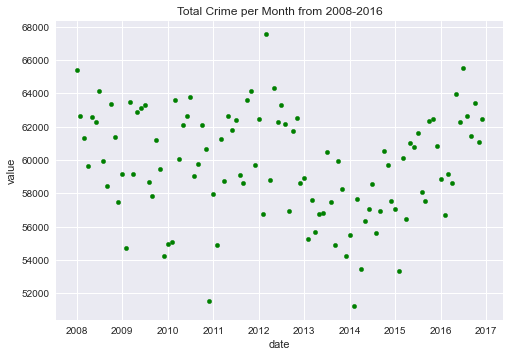

In [12]:
df11.plot(kind = 'scatter', x = 'date', y = 'value', color='green')
plt.title('Total Crime per Month from 2008-2016')
plt.show()

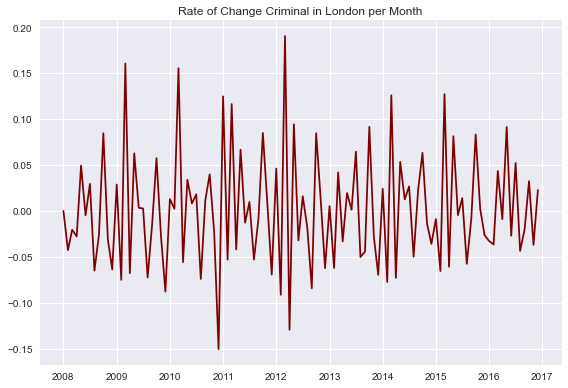

In [13]:
plt.plot(df11.date, df11.change_per_month, color='maroon')
plt.title('Rate of Change Criminal in London per Month')
plt.tight_layout()
plt.show()

Jumlah peristiwa kriminalitas di London dan perubahan jumlah peristiwa dari tahun ke tahun cenderung fluktuatif. Melalui visualisasi di atas yang dapat digaris bawahi adalah bahwa tahun 2012 adalah tahun dengan jumlah peristiwa kriminalitas yang paling banyak dan persentase perubahan yang sangat signifikan

# Top 5 Total Crime per Major Category from 2008-2016

In [14]:
df1 = df[['major_category','value']].groupby(['major_category']).agg({'value':'sum'}, index=False).sort_values(by='value', ascending=False)
df1

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


In [15]:
total_crimes = df1.value.sum()
df1['total crime per major category'] = (df1.value / total_crimes) * 100
df1

,value,total crime per major category
major_category,,
Theft and Handling,2661861,41.283513
Violence Against the Person,1558081,24.164694
Burglary,754293,11.698531
Criminal Damage,630938,9.785386
Drugs,470765,7.301220
Robbery,258873,4.014930
Other Notifiable Offences,106349,1.649395
Fraud or Forgery,5325,0.082587
Sexual Offences,1273,0.019743


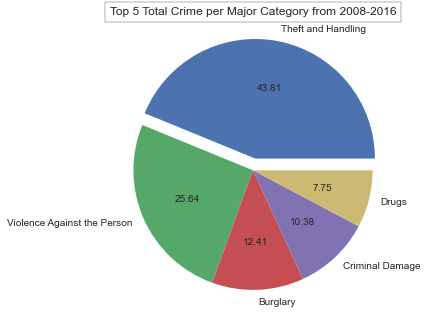

In [16]:
explode=[0.1,0,0,0,0]
df1['total crime per major category'].head(5).plot(kind='pie', autopct='%.2f', explode = explode)
plt.ylabel('')
plt.title('Top 5 Total Crime per Major Category from 2008-2016', bbox={'facecolor':'1', 'pad':5})
plt.show()

Sepanjang 2008 hingga 2016, kejahatan utama yang sering terjadi adalah Theft dan Handling dengan persentase sebesar 43.81%. Kemudian, disusul dengan Violence Against the Person dengan persentase sebesar 25.64%

# Top 5 Major Crime Category Over Time

In [17]:
df2 = df[['major_category','value','year','month']].groupby(['major_category','year','month'], as_index = False).agg({'value':'sum'}, index=False)
df2

,major_category,year,month,value
0,Burglary,2008,1,8396
1,Burglary,2008,2,7296
2,Burglary,2008,3,7485
3,Burglary,2008,4,6827
4,Burglary,2008,5,6889
...,...,...,...,...
967,Violence Against the Person,2016,8,19762
968,Violence Against the Person,2016,9,19534
969,Violence Against the Person,2016,10,19588
970,Violence Against the Person,2016,11,18441


In [18]:
df5 = df2[(df2['major_category'] == 'Theft and Handling')]
df5['date'] = pd.to_datetime(df5.year.map(str) + '-' + df5.month.map(str), format = '%Y-%m')
df5.set_index('date',inplace=True)
df5.drop(['year','month'], axis=1, inplace=True)
df5.drop(['major_category'], axis=1, inplace=True)
df5.rename(columns={'value':'Theft and Handling'}, inplace=True)
df5['Violence Against the Person'] = df2[(df2['major_category'] == 'Violence Against the Person')]['value'].to_list()
df5['Burglary'] = df2[(df2['major_category'] == 'Burglary')]['value'].to_list()
df5['Criminal Damage'] = df2[(df2['major_category'] == 'Criminal Damage')]['value'].to_list()
df5['Drugs'] = df2[(df2['major_category'] == 'Drugs')]['value'].to_list()
df5

,Theft and Handling,Violence Against the Person,Burglary,Criminal Damage,Drugs
date,,,,,
2008-01-01,24014,12719,8396,8061,5230
2008-02-01,22980,12123,7296,7677,6071
2008-03-01,23632,13244,7485,7818,5769
2008-04-01,23660,12590,6827,8113,5158
2008-05-01,23695,14577,6889,8273,5868
...,...,...,...,...,...
2016-08-01,25176,19762,5406,5584,3442
2016-09-01,24999,19534,5280,5210,3091
2016-10-01,26303,19588,5475,5456,3204


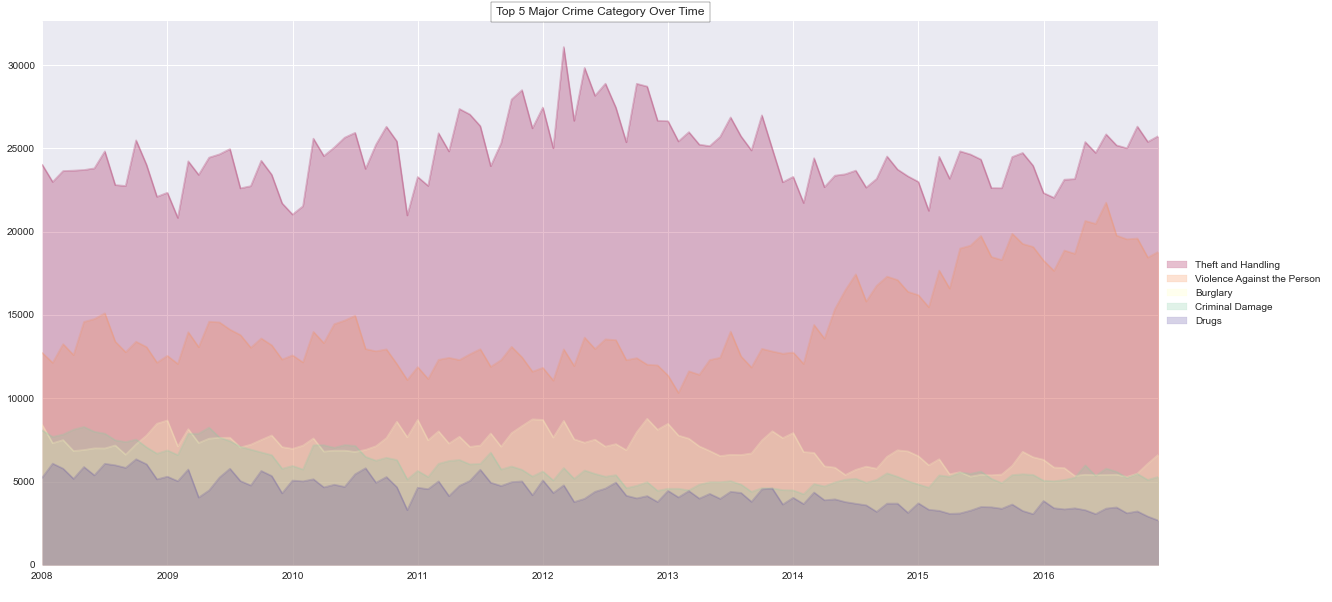

In [19]:
ax = df5.plot(kind='area', alpha =0.25, stacked=False, figsize=(20,10), colormap='Spectral')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Top 5 Major Crime Category Over Time', bbox={'facecolor':'1', 'pad':5})
plt.xlabel(' ')
plt.show()

- Kejahatan utama Theft and Handling di London mengalami tren peningkatan dari tahun 2008 hingga mencapai puncaknya pada tahun 2012. Kemudian, peristiwa kejahatan Theft and Handling mulai mengalami penurunan secara perlahan hingga tahun 2014 sebelum kembali mengalami peningkatan hingga tahun 2016
- Kejahatan utama Violence Against the Person secara keseluruhan menunjukkan tren peningkatan dari tahun 2008 hingga 2016
- Kejahatan Burglary, Criminal Damage, dan Drugs dari tahun 2008 hingga 2016 menunjukkan tren penurunan secara perlahan

# Minor Category Crime in London

In [20]:
stopwords = set(STOPWORDS)

In [21]:
minor = WordCloud(background_color= 'white', stopwords= stopwords, max_words=100)
minor.generate(str(df.minor_category.values))

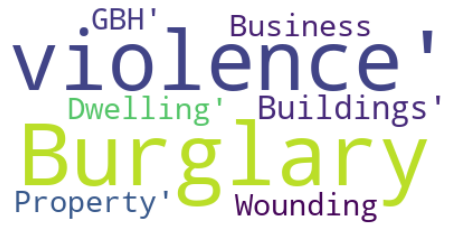

In [22]:
plt.imshow(minor, interpolation='bilinear')
plt.axis('off')
plt.show()

Burglary merupakan salah satu kejahatan minor yang sering terjadi di London

# Top 3 Borough where Crime is Common

In [23]:
df3 = df[['borough','value']].groupby(['borough']).agg({'value':'sum'}, index=False).sort_values(by='value', ascending=False)

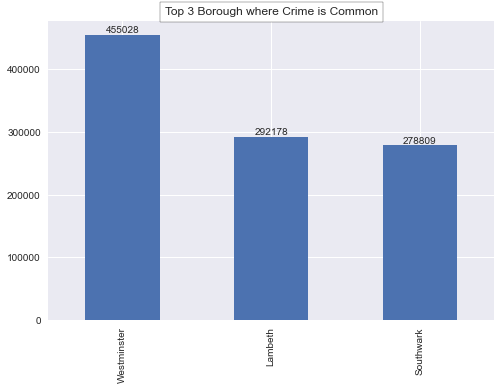

In [24]:
ax = df3.head(3).plot(kind='bar', legend=False)
ax.bar_label(ax.containers[0])
plt.title('Top 3 Borough where Crime is Common',bbox={'facecolor':'1', 'pad':5})
plt.xlabel('')
plt.show()

Wilayah di London yang sering terjadi peristiwa kriminal adalah Westminster dengan peristiwa kejahatan sebanyak 455.028 dari 2008 hingga 2016.

# Minor Crime and Major Crime in Westminster

In [25]:
df6 = df[(df['borough']=='Westminster')][['major_category','minor_category','value','year']]
df6

,major_category,minor_category,value,year
21,Theft and Handling,Handling Stolen Goods,0,2012
46,Criminal Damage,Other Criminal Damage,0,2008
74,Violence Against the Person,Wounding/GBH,0,2009
134,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014
165,Theft and Handling,Other Theft Person,0,2015
...,...,...,...,...
13490302,Violence Against the Person,Assault with Injury,1,2015
13490346,Theft and Handling,Theft From Shops,1,2008
13490386,Robbery,Personal Property,0,2009
13490545,Theft and Handling,Other Theft,17,2012


# Minor Category

In [26]:
df6[['minor_category','value','year']].groupby(['minor_category'], as_index=False).agg({'value':'sum'}).sort_values(by='value', ascending=False)

,minor_category,value
21,Other Theft,142032
22,Other Theft Person,56756
28,Theft From Shops,35929
25,Possession Of Drugs,32106
27,Theft From Motor Vehicle,21735
12,Harassment,20976
0,Assault with Injury,20219
4,Common Assault,19127
1,Burglary in Other Buildings,17184
24,Personal Property,15050


Berdasarkan tabel di atas kejahatan minor yang paling banyak terjadi di Westminster adalah Other Theft. Oleh karena itu, selanjutnya kita akan melihat persebaran data dari Other Theft di Westminster dari 2008-2016

In [27]:
df7 = df6[df6['minor_category']=='Other Theft']
df7

,major_category,minor_category,value,year
751,Theft and Handling,Other Theft,11,2008
763,Theft and Handling,Other Theft,5,2011
785,Theft and Handling,Other Theft,1,2012
1530,Theft and Handling,Other Theft,6,2009
3950,Theft and Handling,Other Theft,5,2012
...,...,...,...,...
13487823,Theft and Handling,Other Theft,1,2012
13488790,Theft and Handling,Other Theft,4,2016
13489849,Theft and Handling,Other Theft,0,2014
13490133,Theft and Handling,Other Theft,2,2016


In [28]:
df7gr = df7[['value','year']].groupby(['year'], as_index=False).agg({'value':'sum'})
df7gr

,year,value
0,2008,16501
1,2009,16045
2,2010,15906
3,2011,17872
4,2012,19556
5,2013,16620
6,2014,13790
7,2015,13570
8,2016,12172


In [29]:
df7gr.describe()

,year,value
count,9.000000,9.000000
mean,2012.000000,15781.333333
std,2.738613,2286.045439
min,2008.000000,12172.000000
25%,2010.000000,13790.000000
50%,2012.000000,16045.000000
75%,2014.000000,16620.000000
max,2016.000000,19556.000000


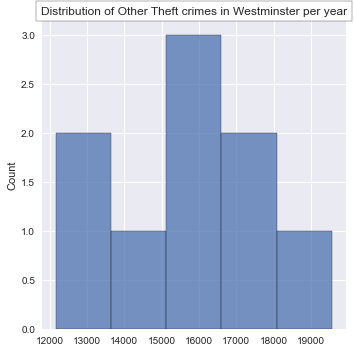

In [30]:
sns.displot(data=df7gr, x="value")
plt.title("Distribution of Other Theft crimes in Westminster per year",bbox={'facecolor':'1', 'pad':5})
plt.xlabel("")
plt.show()

Berdasarkan persebaran data dari Other Theft Crimes di Westminster dari tahun ke tahun dapat dilihat bahwa data tergolong symmetric atau normally distributed. Artinya dalam hal ini angka terjadinya other theft crimes in Westminster per bulan dari tahun 2008-2016 tersebar secara merata. Selain itu apabila dilihat dari visualisasi di atas dapat diketahui sebaran data dari angka terjadinya peristiwa other theft di Westminster. Sebaran data tersebut berada di range mean ± 1 * std, yaitu berada pada rentang 13.495,285 ⩽ Y ⩽ 18.067,375.

## Major Category

In [31]:
df6[['major_category','value','year']].groupby(['major_category'], as_index=False).agg({'value':'sum'}).sort_values(by='value', ascending=False)

,major_category,value
7,Theft and Handling,277617
8,Violence Against the Person,71448
2,Drugs,34031
0,Burglary,29295
1,Criminal Damage,20405
5,Robbery,15752
4,Other Notifiable Offences,6148
3,Fraud or Forgery,273
6,Sexual Offences,59


Berdasarkan tabel di atas kejahatan utama yang sering terjadi di Westminster adalah Theft and Handling dan Violence Against the Person. Oleh karena itu, selanjutnya kita akan melihat perbedaan data dari kedua kategori kejahatan utama tersebut

In [32]:
df6_maj = df[(df['borough']=='Westminster') & ((df['major_category']=='Theft and Handling') | (df['major_category']=='Violence Against the Person'))][['value','major_category', 'year']]
df6_maj

,value,major_category,year
21,0,Theft and Handling,2012
74,0,Violence Against the Person,2009
134,1,Theft and Handling,2014
165,0,Theft and Handling,2015
187,3,Theft and Handling,2013
...,...,...,...
13490133,2,Theft and Handling,2016
13490302,1,Violence Against the Person,2015
13490346,1,Theft and Handling,2008
13490545,17,Theft and Handling,2012


In [33]:
df6_majgr = df6_maj[['major_category','value','year']].groupby(['major_category','year'], as_index=False).agg({'value':'sum'})

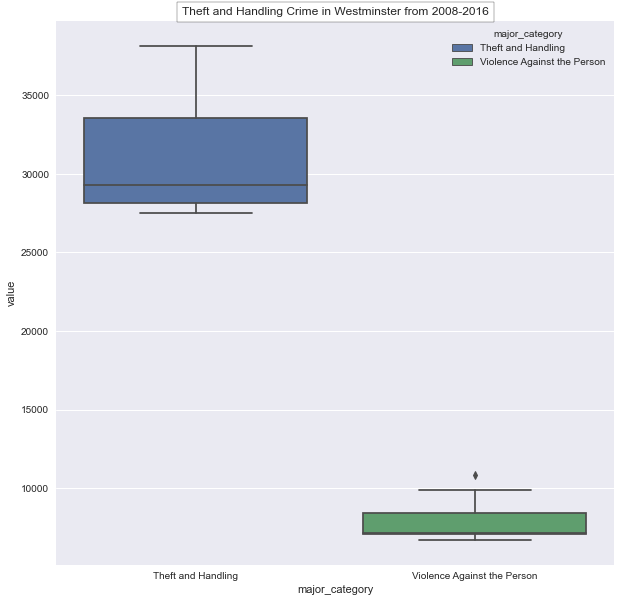

In [34]:
fig = plt.figure(figsize=(10,10))

sns.boxplot(data=df6_majgr, x="major_category", y="value", hue="major_category", dodge=False)
plt.title("Theft and Handling Crime in Westminster from 2008-2016",bbox={'facecolor':'1', 'pad':5})
plt.show()

Berdasarkan boxplot di atas dapat dilihat bahwa angka kejahatan Theft and Handling dan Violence Against the Person memiliki rata-rata yang berbeda cukup signifikan. Angka peristiwa dari Theft and Handling terjadi paling banyak pada tahun 2012 dengan jumlah peristiwa sebesar 38152. Kemudian untuk Violence against the person paling banyak terjadi pada tahun 2016 dengan jumlah peristiwa sebesar 10834

# Conclusion

Secara keseluruhan, tingkat kriminalitas di London meningkat secara signifikan pada tahun 2012. Kemudian, kejahatan utama yang sering terjadi di London adalah Theft and Handling. Kejahatan ini pada tahun 2008-2012 mengalami tren peningkatan jumlah peristiwa kemudian setelah itu mulai mengalami penurunan secara perlahan. Selain theft and handling kejahatan utama yang juga sering terjadi adalah Violence Against the Person. Berbeda dari Theft dan Handling, Violence Against the Person mengalami tren peningkatan dari tahun 2008 hingga 2016. Kemudian, wilayah di London yang sering terjadi peristiwa kriminalitas adalah Westminster. Di Westminster sendiri dari tahun 2008 hingga 2016 telah terjadi 455028 peristiwa kriminalitas. Untuk kejahatan utama yang paling banyak terjadi di Westminster dari tahun ke tahun juga Theft and Handling. Sementara itu, untuk kejahatan minor yang terjadi di wilayah ini adalah other theft. Peningkatan dan penurunan angka peristiwa other theft di Westminster setiap bulannya tidak terlalu signifikan. Angka kejadian other theft di Westminster tersebar secara merata tiap bulannya dan persebarannya berada di rentang 13.495,285 hingga 18.067,375 peristiwa per bulan. Selanjutnya, untuk kejahatan Theft and Handling di Westminster paling banyak terjadi pada tahun 2012 sedangkan untuk Violence against the person di Westminster paling banyak terjadi di tahun 2016.